# Exploratory Data Analysis-Terrorism

The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncovertrends, identify high-risk regions, understand attack characteristics,and potentially revealfactors that contribute to terrorist activities.


## Loading Packages

First we want to load the packages need for this project


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd


## Read the Data

Now, We want to load the  global terrorism data by using pandas package. This terrorism data give information regarding the terrorist attacks around the world from 1970 through 2017. 

In [2]:
data = pd.read_csv("C:/Users/swani/Downloads/terrorism.csv", encoding='latin-1')


C:\Users\swani\AppData\Local\Temp\ipykernel_14216\549929930.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/swani/Downloads/terrorism.csv", encoding='latin-1')


In [3]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


Most of the columns contain null values .So we want to delete that columns from this data. We want to clean the data  and make it suitable for the analysis

## Data Wrangling

Data Wrangling ,also known as data cleaning.In this project ,it include handling of null values,aggregrating data for analysis and so on.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [5]:
null_counts = data.isnull().sum()

total_rows = len(data)
percentage_missing = (null_counts / total_rows) * 100
missing_summary = pd.DataFrame({'Total Missing': null_counts, 'Percentage Missing': percentage_missing})
missing_summary

,Total Missing,Percentage Missing
eventid,0,0.000000
iyear,0,0.000000
imonth,0,0.000000
iday,0,0.000000
approxdate,172452,94.914993
...,...,...
INT_LOG,0,0.000000
INT_IDEO,0,0.000000
INT_MISC,0,0.000000
INT_ANY,0,0.000000


Here, we want to remove the columns having large number of null values

### Removing columns having more than 80% Nan Values

In [6]:
total_rows = len(data)
null_percentage = (data.isnull().sum() / total_rows) * 100
removed_columns = null_percentage[null_percentage > 20].index.tolist()
data2 = data.drop(columns=removed_columns)
data2

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,2.017120e+11,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,2.017120e+11,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,2.017120e+11,2017,12,31,0,92,India,6,South Asia,Manipur,...,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


### Selection of suitable columns

In [7]:
data2.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

There is only some columns of the cleaned data is used for analysis. So select the suitable columns and remove the other columns.

In [8]:
data3=data2.rename(columns={'eventid':'id','iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country', 'region_txt':'Region', 'provstate':'State', 'city':'City', 'latitude':'Latitude','longitude':'Longitude','attacktype1':'Attack','attacktype1_txt':'Attack_type','nkill':'Killed', 'nwound':'Wounded', 'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','gname':'Group'})

In [9]:
data4=data3[['id','Year','Month','Day','Country','Region','State','City','Latitude','Longitude','Attack','Attack_type','Killed','Wounded','Target_type','Weapon_type','Group']]

In [10]:
data4

,id,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Attack,Attack_type,Killed,Wounded,Target_type,Weapon_type,Group
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,1.0,0.0,Private Citizens & Property,Unknown,MANO-D
1,1.970000e+11,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,6,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),Unknown,23rd of September Communist League
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,Journalists & Media,Unknown,Unknown
3,1.970010e+11,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,3,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Explosives,Unknown
4,1.970010e+11,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,7,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Incendiary,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2,Armed Assault,1.0,2.0,Military,Firearms,Al-Shabaab
181687,2.017120e+11,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,3,Bombing/Explosion,2.0,7.0,Military,Explosives,Muslim extremists
181688,2.017120e+11,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,7,Facility/Infrastructure Attack,0.0,0.0,Private Citizens & Property,Incendiary,Bangsamoro Islamic Freedom Movement (BIFM)
181689,2.017120e+11,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,3,Bombing/Explosion,0.0,0.0,Government (General),Explosives,Unknown


In [11]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           181691 non-null  float64
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   State        181270 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  Attack       181691 non-null  int64  
 11  Attack_type  181691 non-null  object 
 12  Killed       171378 non-null  float64
 13  Wounded      165380 non-null  float64
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Group        181691 non-null  object 
dtypes: float64(5), int64(4), object(8)
memory usage: 23.6+ MB


In [12]:
null_counts1 = data4.isnull().sum()

total_rows1 = len(data4)
percentage_missing1 = (null_counts1 / total_rows1) * 100
missing_summary1 = pd.DataFrame({'Total Missing': null_counts1, 'Percentage Missing': percentage_missing1})
missing_summary1

,Total Missing,Percentage Missing
id,0,0.000000
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
Region,0,0.000000
State,421,0.231712
City,434,0.238867
Latitude,4556,2.507554
Longitude,4557,2.508104


Here We want to make the null values of columns Killed and Wounded to the value zero.

In [13]:
data4['Killed'].fillna(0, inplace=True)


C:\Users\swani\AppData\Local\Temp\ipykernel_14216\1825982361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Killed'].fillna(0, inplace=True)


In [14]:
data4['Wounded'].fillna(0, inplace=True)




C:\Users\swani\AppData\Local\Temp\ipykernel_14216\1923593493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Wounded'].fillna(0, inplace=True)


In [15]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           181691 non-null  float64
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   State        181270 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  Attack       181691 non-null  int64  
 11  Attack_type  181691 non-null  object 
 12  Killed       181691 non-null  float64
 13  Wounded      181691 non-null  float64
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Group        181691 non-null  object 
dtypes: float64(5), int64(4), object(8)
memory usage: 23.6+ MB


## Find the total number of peoples were killed and wounded

Lets findnout total number of people were killed and wounded.First we want to convert null values in this both attributes to zero.


In [16]:
null_counts1 = data4.isnull().sum()

total_rows1 = len(data4)
percentage_missing1 = (null_counts1 / total_rows1) * 100
missing_summary1 = pd.DataFrame({'Total Missing': null_counts1, 'Percentage Missing': percentage_missing1})
missing_summary1

,Total Missing,Percentage Missing
id,0,0.000000
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
Region,0,0.000000
State,421,0.231712
City,434,0.238867
Latitude,4556,2.507554
Longitude,4557,2.508104


In [17]:
total_killed = data4['Killed'].sum()
total_wounded=data4['Wounded'].sum()
pd.DataFrame({"Killed":[total_killed],"Wounded":[total_wounded]})

,Killed,Wounded
0,411868.0,523869.0


## Number of people were killed  and Wounded per year

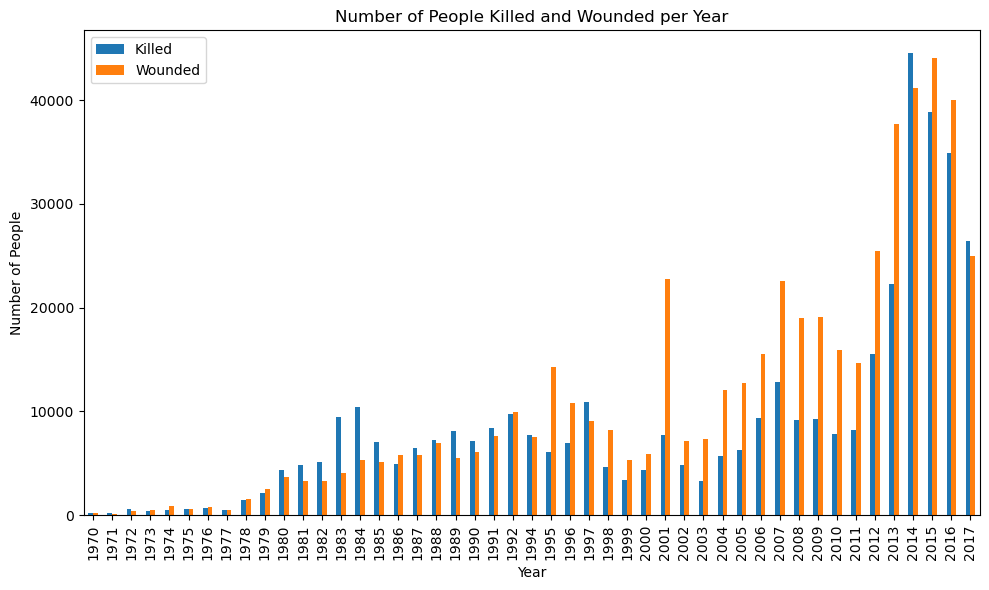

In [18]:
grouped = data4.groupby('Year')[['Killed', 'Wounded']].sum()


fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Number of People Killed and Wounded per Year')
plt.legend(["Killed", "Wounded"])
plt.tight_layout()
plt.show()







In [19]:
grouped

,Killed,Wounded
Year,,
1970,174.0,212.0
1971,173.0,82.0
1972,566.0,409.0
1973,370.0,495.0
1974,539.0,865.0
1975,617.0,617.0
1976,674.0,756.0
1977,456.0,518.0
1978,1459.0,1600.0


Most of the people were killed and wounded between 2012 and 2017. In 2014,there is almost 44490 were killed and 41128 were wounded .

## Information regarding attacks

Here, we want to find out the which mode of attacks was mostly followed by various group.Findout the countries, states  and cities faced most attacks.


### Types Of Attacks

In [20]:

mode_attack = data4.groupby('Group')['Attack_type'].agg(lambda x: x.mode().iloc[0])
result_df = pd.DataFrame({'Group Name': mode_attack.index, 'Mode Attack Type': mode_attack.values})
print(result_df)



                                 Group Name             Mode Attack Type
0                                    01-May            Bombing/Explosion
1                                    09-Feb            Bombing/Explosion
2                                14 K Triad            Bombing/Explosion
3                        14 March Coalition                Armed Assault
4                  14th of December Command            Bombing/Explosion
...                                     ...                          ...
3532                            Zulu Miners                      Unknown
3533                     Zuwar al-Imam Rida  Hostage Taking (Kidnapping)
3534                              Zviadists  Hostage Taking (Kidnapping)
3535                             Zwai Tribe  Hostage Taking (Kidnapping)
3536  leftist guerrillas-Bolivarian militia                Armed Assault

[3537 rows x 2 columns]


In [21]:
attack_types=data4["Attack_type"].unique()
for attack_type in attack_types:
    print(attack_type)

Assassination
Hostage Taking (Kidnapping)
Bombing/Explosion
Facility/Infrastructure Attack
Armed Assault
Hijacking
Unknown
Unarmed Assault
Hostage Taking (Barricade Incident)


Here,the data is discussing about the nine mode of attacks such as Assassination,Hostage Taking (Kidnapping),Bombing/Explosion,Facility/Infrastructure Attack.Armed Assault.Hijacking.Unknown,Unarmed Assault,Hostage Taking (Barricade Incident).Lets draw a pie chart showing distribution of mode of attacks.


(-1.0999992278658395,
 1.0999996344978111,
 -1.099999973142828,
 1.0999999982770166)

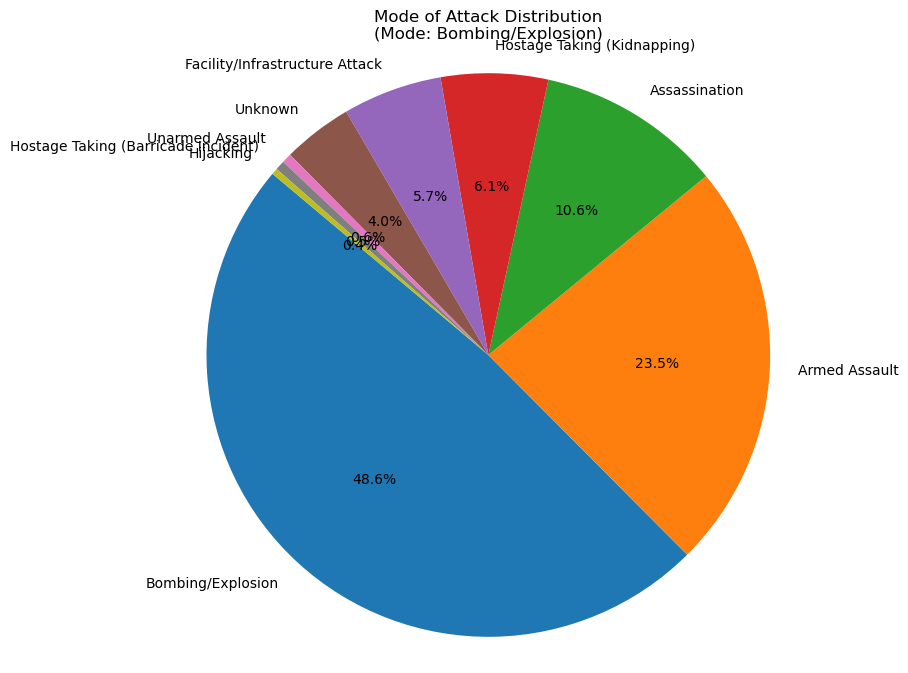

In [22]:
mode_attack = data4['Attack_type'].mode().iloc[0]


mode_attack_counts = data4['Attack_type'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(mode_attack_counts, labels=mode_attack_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Mode of Attack Distribution\n(Mode: {mode_attack})')


plt.axis('equal')  

In [23]:
most_used_attack = data4['Attack_type'].mode()[0]
count_most_used_attack = (data4['Attack_type'] == most_used_attack).sum()
groups_with_most_used_attack = data4[data4['Attack_type'] == most_used_attack]['Group'].unique()
print("Most Used Attack Type:", most_used_attack)
print("Number of Times Used:", count_most_used_attack)




Most Used Attack Type: Bombing/Explosion
Number of Times Used: 88255


In [24]:
mode_attack_per_year = data4.groupby('Year')['Attack_type'].apply(lambda x: x.mode().iloc[0]).reset_index()


mode_attack_per_year.columns = ['Year', 'Mode of Attack']


print(mode_attack_per_year)

    Year     Mode of Attack
0   1970  Bombing/Explosion
1   1971  Bombing/Explosion
2   1972      Assassination
3   1973      Assassination
4   1974  Bombing/Explosion
5   1975  Bombing/Explosion
6   1976  Bombing/Explosion
7   1977  Bombing/Explosion
8   1978  Bombing/Explosion
9   1979  Bombing/Explosion
10  1980  Bombing/Explosion
11  1981  Bombing/Explosion
12  1982  Bombing/Explosion
13  1983  Bombing/Explosion
14  1984  Bombing/Explosion
15  1985  Bombing/Explosion
16  1986  Bombing/Explosion
17  1987  Bombing/Explosion
18  1988  Bombing/Explosion
19  1989  Bombing/Explosion
20  1990  Bombing/Explosion
21  1991  Bombing/Explosion
22  1992  Bombing/Explosion
23  1994  Bombing/Explosion
24  1995  Bombing/Explosion
25  1996  Bombing/Explosion
26  1997  Bombing/Explosion
27  1998  Bombing/Explosion
28  1999  Bombing/Explosion
29  2000  Bombing/Explosion
30  2001  Bombing/Explosion
31  2002  Bombing/Explosion
32  2003  Bombing/Explosion
33  2004  Bombing/Explosion
34  2005  Bombing/Ex

In [25]:
attack_type_counts = data4['Attack_type'].value_counts()

attack_type_counts_df = pd.DataFrame(attack_type_counts.reset_index())
attack_type_counts_df.columns = ['Attack Type', 'Count']
print(attack_type_counts_df)

                           Attack Type  Count
0                    Bombing/Explosion  88255
1                        Armed Assault  42669
2                        Assassination  19312
3          Hostage Taking (Kidnapping)  11158
4       Facility/Infrastructure Attack  10356
5                              Unknown   7276
6                      Unarmed Assault   1015
7  Hostage Taking (Barricade Incident)    991
8                            Hijacking    659


48.6% of the total attacks was taken by using bombing.that is, 88255 attacks was done by using bombing.23.5% and 10.6% of the total attacks are done by Armmed Assault and Assassination

### Terrorist Groups

Let us discuss about various type of terrorist group. lets us find out the terrorist group have most number of attacks.

In [26]:
 data4['Group'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [27]:
data4['Group'].nunique()

3537

There are total 3537 terrorist group in the world

(-1.0999982949459568,
 1.099999864328479,
 -1.0999998393739376,
 1.0999999922915609)

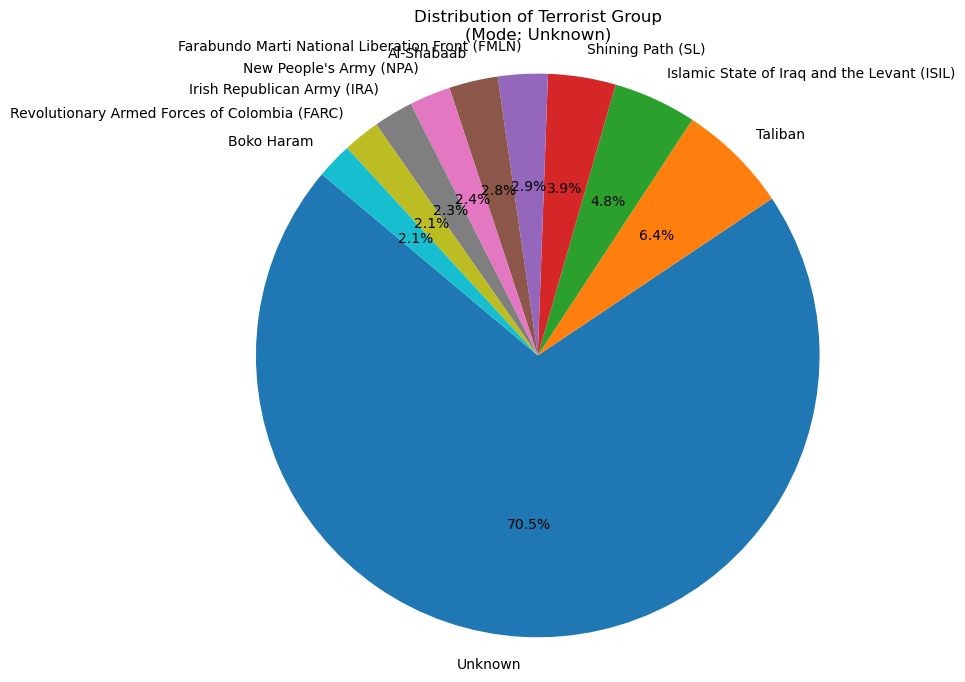

In [28]:
group = data4['Group'].mode().iloc[0]

group_counts = data4['Group'].value_counts()[0:10]
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Terrorist Group\n(Mode: {group})')


plt.axis('equal')    

In [ ]:
70.5% of total attack was done by an unknown terrorist group. That is,82782 attacks.toatl attacks of Taliban and ISIL terrorist are 7478 and 5613 attacks respectively.

### Terrorist Group Vs Types of Attacks

Let us discuss about the terrorist group with their mode of attack.

In [56]:
group_attacks = data4.groupby('Group').size().reset_index(name='Total Attacks')
sorted_groups = group_attacks.sort_values(by='Total Attacks', ascending=False)
sorted_groups[0:10]


,Group,Total Attacks
3408,Unknown,82782
3138,Taliban,7478
1535,Islamic State of Iraq and the Levant (ISIL),5613
2948,Shining Path (SL),4555
1120,Farabundo Marti National Liberation Front (FMLN),3351
177,Al-Shabaab,3288
2266,New People's Army (NPA),2772
1484,Irish Republican Army (IRA),2671
2717,Revolutionary Armed Forces of Colombia (FARC),2487
704,Boko Haram,2418


In [30]:
group_attacks = data4.groupby('Group')['Attack_type'].count().reset_index()
group_attacks.columns = ['Group', 'Total Attacks']
top_10_groups = group_attacks.sort_values(by='Total Attacks', ascending=False).head(11)

mode_attack_types = []
for group_name in top_10_groups['Group']:
    mode_attack = data4[data4['Group'] == group_name]['Attack_type'].mode().iloc[0]
    mode_attack_types.append(mode_attack)
top_10_groups['Mode of Attack'] = mode_attack_types
top_terrorist=top_10_groups[1:10]
top_terrorist

,Group,Total Attacks,Mode of Attack
3138,Taliban,7478,Bombing/Explosion
1535,Islamic State of Iraq and the Levant (ISIL),5613,Bombing/Explosion
2948,Shining Path (SL),4555,Bombing/Explosion
1120,Farabundo Marti National Liberation Front (FMLN),3351,Armed Assault
177,Al-Shabaab,3288,Bombing/Explosion
2266,New People's Army (NPA),2772,Armed Assault
1484,Irish Republican Army (IRA),2671,Bombing/Explosion
2717,Revolutionary Armed Forces of Colombia (FARC),2487,Bombing/Explosion
704,Boko Haram,2418,Armed Assault


#### Bar plot of top 10 terrorist groups according their attacks and mode of attack

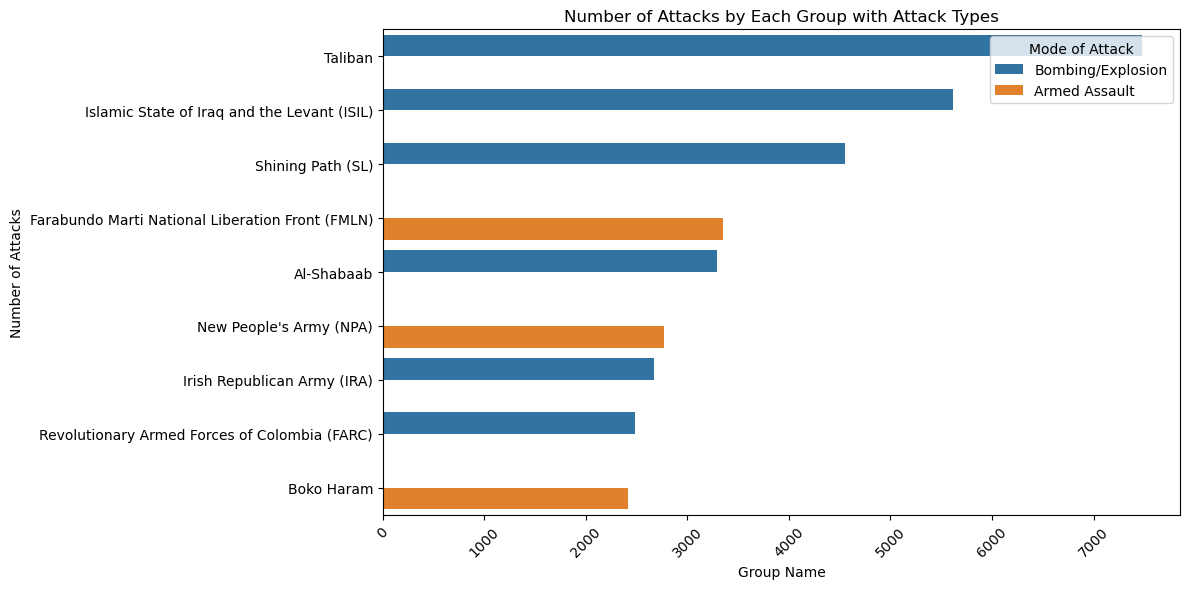

In [31]:


plt.figure(figsize=(12, 6))
sns.barplot(data=top_terrorist, x='Total Attacks', y='Group', hue='Mode of Attack')
plt.xlabel('Group Name')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Each Group with Attack Types')
plt.legend(title='Mode of Attack')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [32]:
group_attacks = data4.groupby('Group')['id'].count().reset_index()
group_attacks.columns = ['Group Name', 'Total Attacks']
top_10_groups = group_attacks.sort_values(by='Total Attacks', ascending=False).head(10)
group_attack_types = {}
for group_name in top_10_groups['Group Name']:
    group_data = data4[data4['Group'] == group_name]
    Attack_type_counts = group_data['Attack_type'].value_counts().to_dict()
    group_attack_types[group_name] = Attack_type_counts


    
for group, Attack_type in group_attack_types.items():
    print(f"Group: {group}")
    for Attack_type, count in Attack_type.items():
        print(f"{Attack_type}: {count} attacks")
    print("\n")


Group: Unknown
Bombing/Explosion: 46968 attacks
Armed Assault: 16620 attacks
Assassination: 9330 attacks
Facility/Infrastructure Attack: 4043 attacks
Hostage Taking (Kidnapping): 3457 attacks
Unknown: 1528 attacks
Unarmed Assault: 409 attacks
Hijacking: 265 attacks
Hostage Taking (Barricade Incident): 162 attacks


Group: Taliban
Bombing/Explosion: 2866 attacks
Armed Assault: 2125 attacks
Unknown: 966 attacks
Hostage Taking (Kidnapping): 713 attacks
Assassination: 508 attacks
Facility/Infrastructure Attack: 235 attacks
Unarmed Assault: 33 attacks
Hostage Taking (Barricade Incident): 19 attacks
Hijacking: 13 attacks


Group: Islamic State of Iraq and the Levant (ISIL)
Bombing/Explosion: 3679 attacks
Unknown: 706 attacks
Hostage Taking (Kidnapping): 608 attacks
Armed Assault: 421 attacks
Assassination: 117 attacks
Facility/Infrastructure Attack: 58 attacks
Hostage Taking (Barricade Incident): 20 attacks
Hijacking: 4 attacks


Group: Shining Path (SL)
Bombing/Explosion: 2161 attacks
Armed

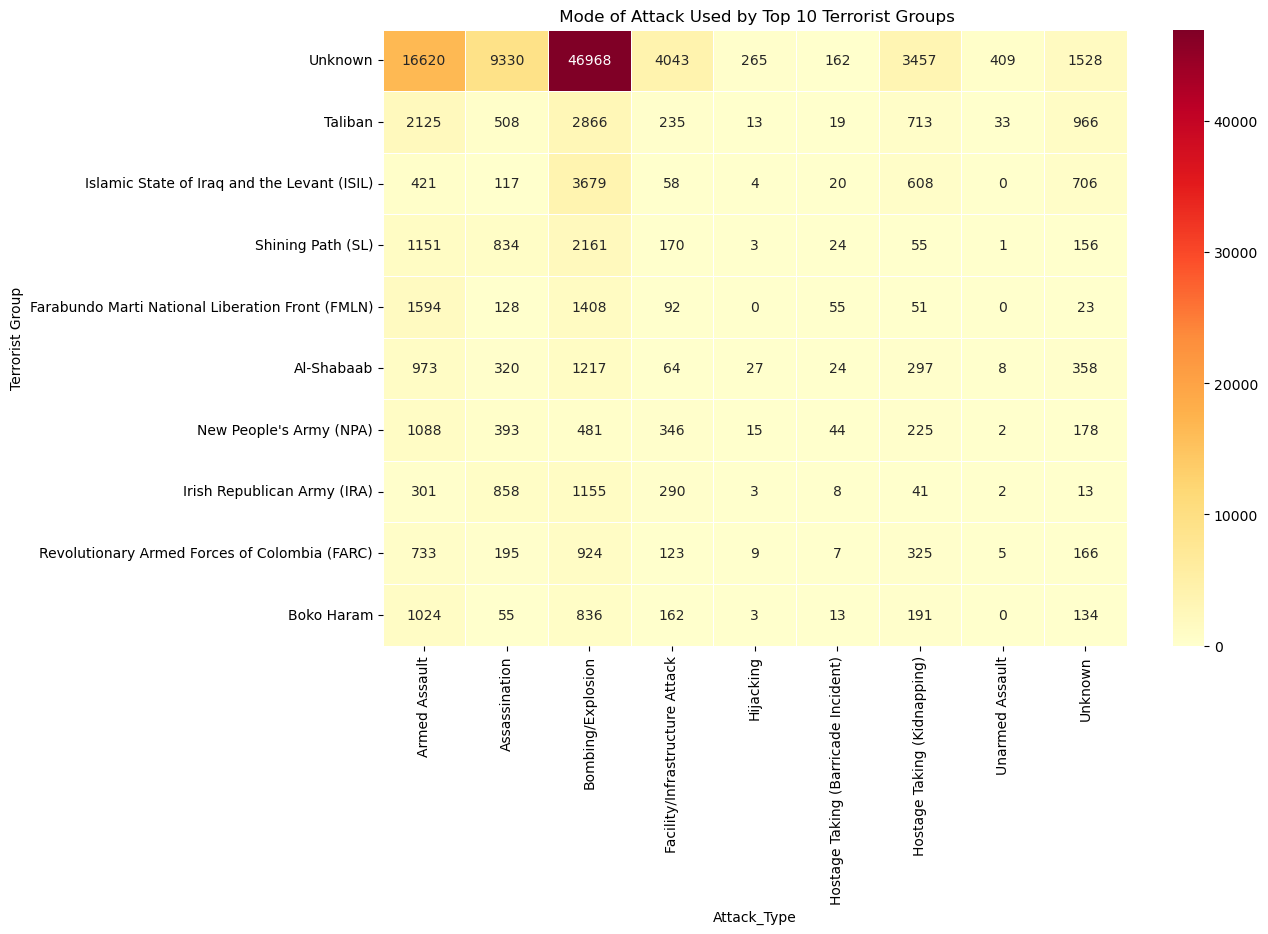

In [33]:
group_attack_counts = data4.groupby(['Group', 'Attack_type']).size().unstack(fill_value=0)

top_10_groups = group_attack_counts.sum(axis=1).nlargest(10).index
top_n_weapon_types = group_attack_counts.sum().index
subset = group_attack_counts.loc[top_10_groups, top_n_weapon_types]

plt.figure(figsize=(12, 8))
sns.heatmap(subset, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title(' Mode of Attack Used by Top 10 Terrorist Groups')
plt.xlabel('Attack_Type')
plt.ylabel('Terrorist Group')

plt.show()

These heatmap and bar plot showing the attack of terrorist with various mode of attack.46968 attacks of unknown group is done by using bombing and 16620 attacks is done by using Armed Assault.2866 attacks of taliban and 3679 attacks of ISIL are done by bombing.This heat map is showing the attacks of top 10 group with respect to their mode of attack.

#### Number of terrorist attacks per year by top 10 terrorist groups

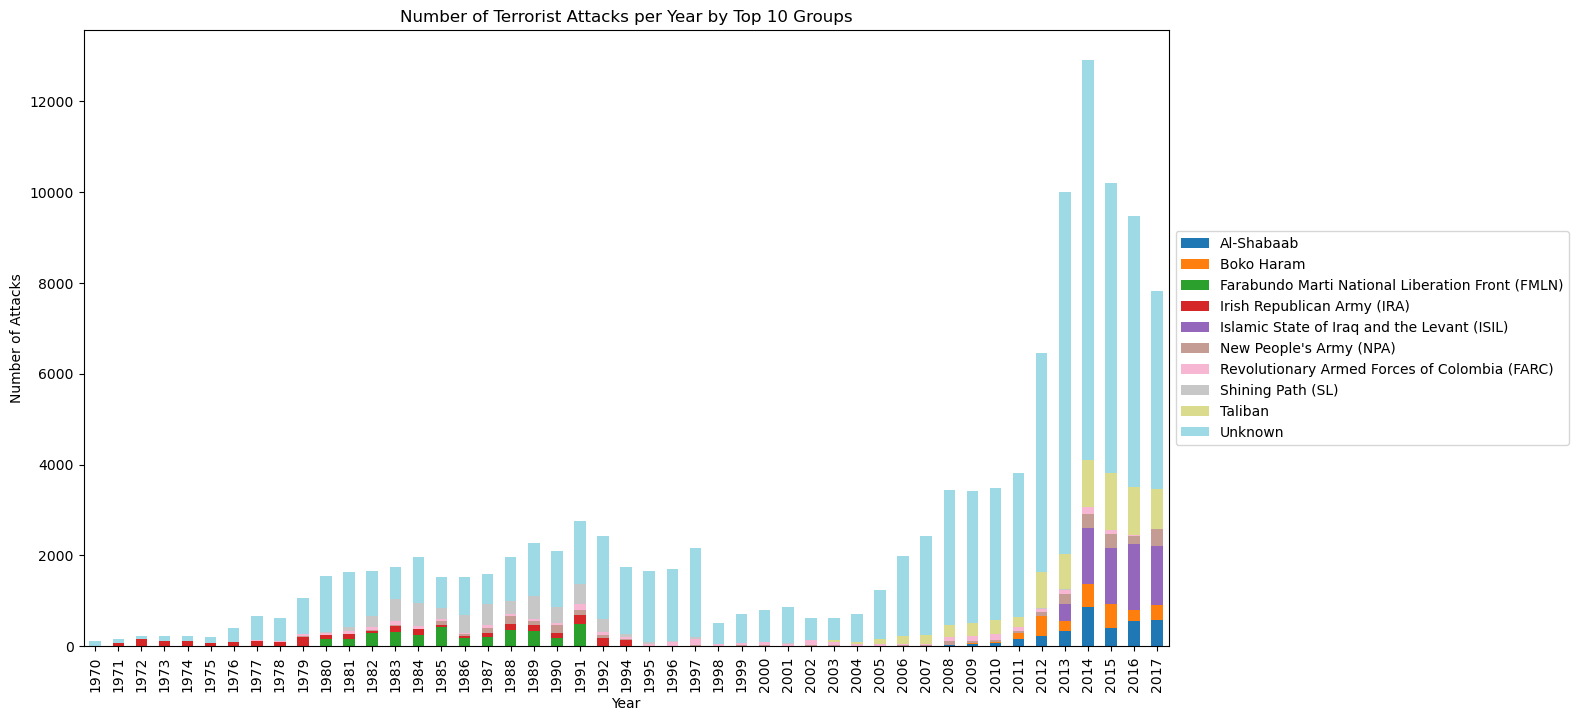

In [57]:
group_attacks = data4.groupby(['Year', 'Group'])['id'].count().reset_index()
top_10_groups = group_attacks.groupby('Group')['id'].sum().nlargest(10).index

filtered_data = group_attacks[group_attacks['Group'].isin(top_10_groups)]
pivot_table = filtered_data.pivot(index='Year', columns='Group', values='id').fillna(0)
plt.figure(figsize=(14, 8))

pivot_table.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks per Year by Top 10 Groups')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()







This stacked bar plot is showing number attack per with respect to top 10 terrorist group.In this plot, we can easily understand the number of attack per year and also find that which group held more number of attacks and so on.Most of attacks was done by unknown group and taliban group.Most number of attacks were happened in during the period of 2013-2017. 

## Countries Vs Terrorism

In [35]:
country_counts = data4['Country'].value_counts()
top_10_countries_df = pd.DataFrame(country_counts.head(10).reset_index())
top_10_countries_df.columns = ['Country', 'Total Attacks']
top_10_countries_df 

,Country,Total Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


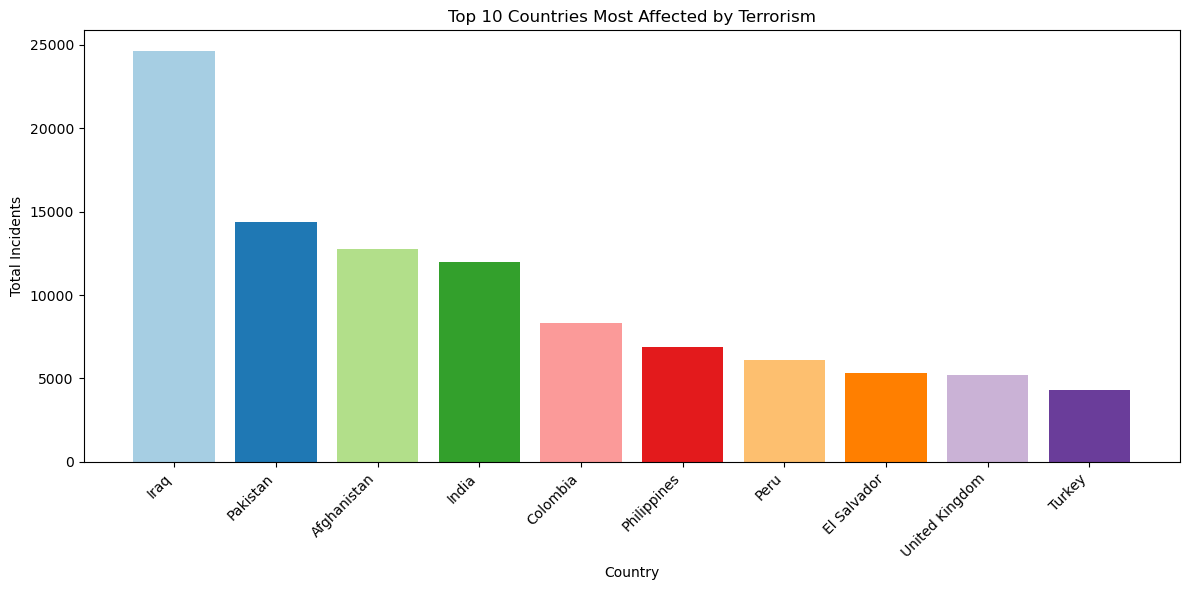

In [36]:


plt.figure(figsize=(12, 6))
Colors = plt.cm.Paired(range(len(top_10_countries_df)))
plt.bar(top_10_countries_df['Country'], top_10_countries_df['Total Attacks'], color=Colors)
plt.xlabel('Country')
plt.ylabel('Total Incidents')
plt.title('Top 10 Countries Most Affected by Terrorism')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\swani\AppData\Local\Temp\ipykernel_14216\3383968508.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


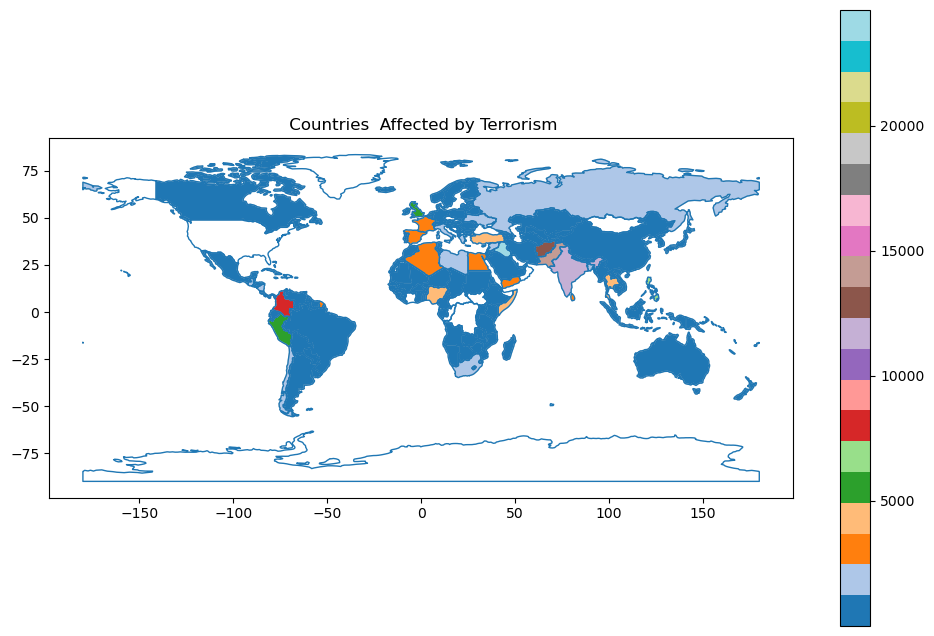

In [37]:
country_counts = data4['Country'].value_counts()
countries_df = pd.DataFrame(country_counts.reset_index())
countries_df.columns = ['Country', 'Total Attacks']
countries_df

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(countries_df, left_on='name', right_on='Country', how='left')
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='Total Attacks', cmap='tab20', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title(' Countries  Affected by Terrorism')
plt.show()

Using this graphical represention of map and bar plot we can easily understand that which country affect more attacks.There were 24636 attacks affected by Iraq. Iraq is most affected country in the world.Pakistan,India and Afghanistan also affected 14368,11960 and 12731 number of attacks

## State Vs Terrorism

In [38]:
State_counts = data4['State'].value_counts()
top_10_state_df = pd.DataFrame(State_counts.head(10).reset_index())
top_10_state_df.columns = ['State', 'Total Attacks']
top_10_state_df 

,State,Total Attacks
0,Baghdad,7645
1,Northern Ireland,4498
2,Unknown,4290
3,Balochistan,3710
4,Saladin,3411
5,Al Anbar,3299
6,Nineveh,3241
7,Sindh,3206
8,Khyber Pakhtunkhwa,3084
9,Diyala,3041


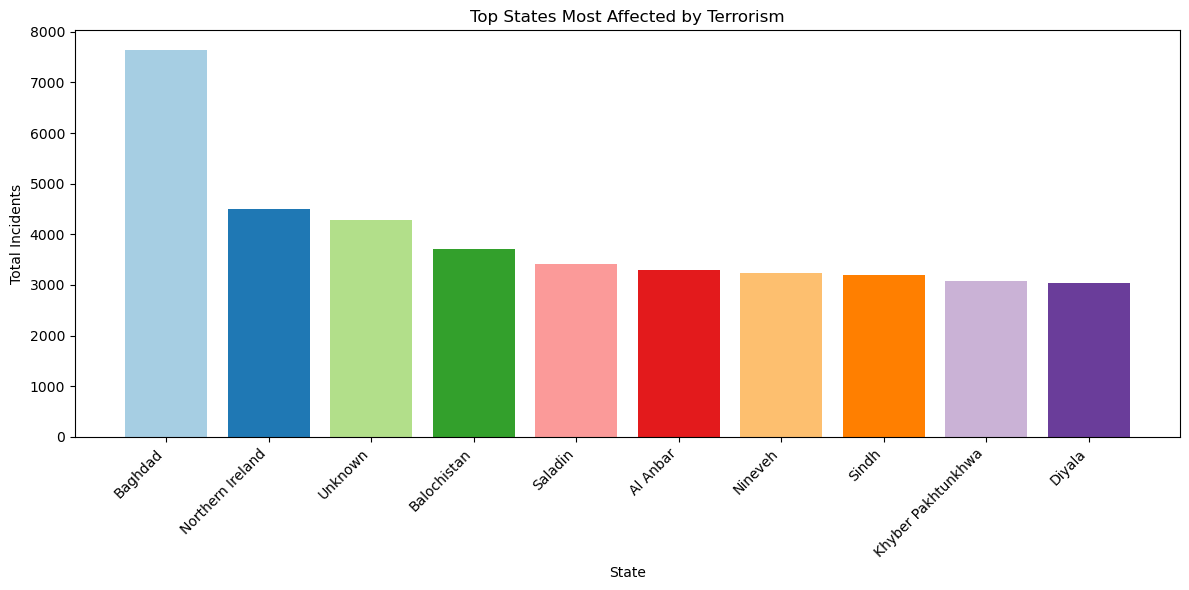

In [39]:
plt.figure(figsize=(12, 6))
Colors = plt.cm.Paired(range(len(top_10_state_df)))
plt.bar(top_10_state_df['State'], top_10_state_df['Total Attacks'], color=Colors)
plt.xlabel('State')
plt.ylabel('Total Incidents')
plt.title('Top States Most Affected by Terrorism')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\swani\AppData\Local\Temp\ipykernel_14216\1102022763.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


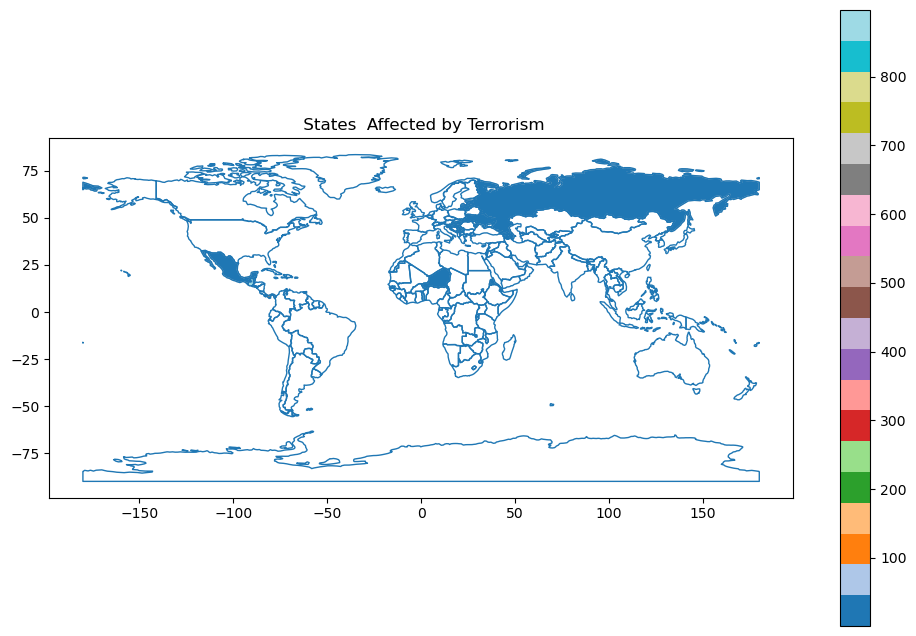

In [40]:
state_counts = data4['State'].value_counts()
state_df = pd.DataFrame(state_counts.reset_index())
state_df.columns = ['State', 'Total Attacks']
state_df

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(state_df, left_on='name', right_on='State', how='left')
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='Total Attacks', cmap='tab20', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title(' States  Affected by Terrorism')
plt.show()

Using this graphical represention of map and bar plot we can easily understand that which state affect more attacks.There were 7645 attacks affected by Baghdad. 7645 is most affected state in the world.Northern Ireland and Balochistan also affected 4498 and 3710 number of attacks respectively

## Terrorism affected by various cities

In [41]:
City_counts = data4['City'].value_counts()
top_10_city_df = pd.DataFrame(City_counts.head(10).reset_index())
top_10_city_df.columns = ['City', 'Total Attacks']
top_10_city_df[1:10] 

,City,Total Attacks
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171
6,Santiago,1621
7,Mogadishu,1581
8,San Salvador,1558
9,Istanbul,1048


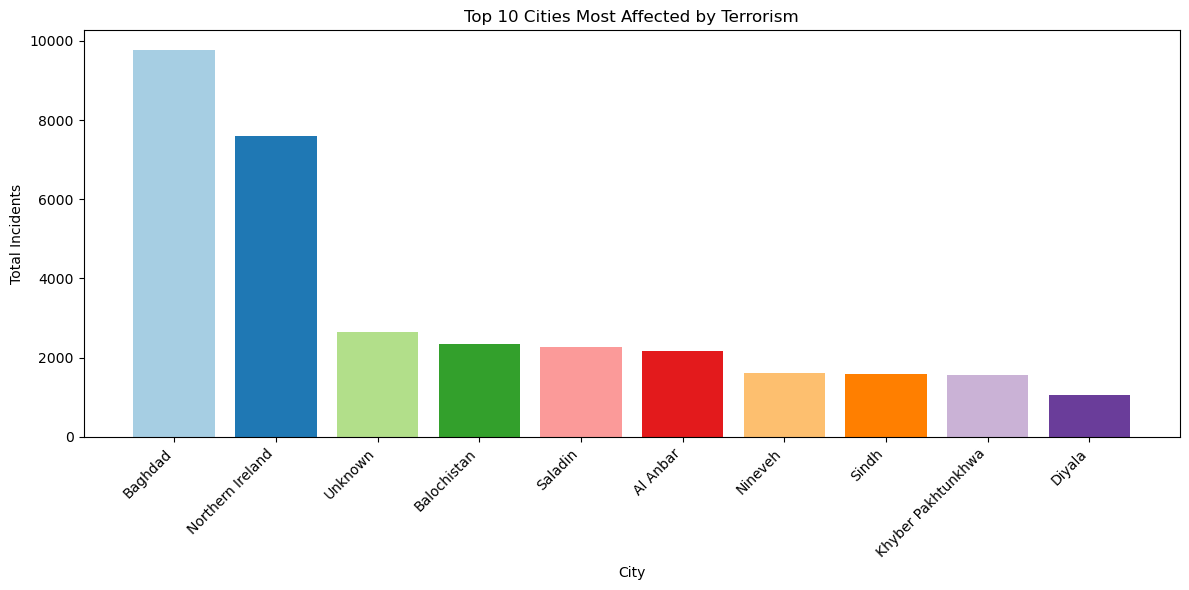

In [42]:
plt.figure(figsize=(12, 6))
Colors = plt.cm.Paired(range(len(top_10_city_df)))
plt.bar(top_10_state_df['State'], top_10_city_df['Total Attacks'], color=Colors)
plt.xlabel('City')
plt.ylabel('Total Incidents')
plt.title('Top 10 Cities Most Affected by Terrorism')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Terrorism affected by various region

In [43]:
Region_counts = data4['Region'].value_counts()
top_10_Region_df = pd.DataFrame(Region_counts.head(10).reset_index())
top_10_Region_df.columns = ['Region', 'Total Attacks']
top_10_Region_df 

,Region,Total Attacks
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


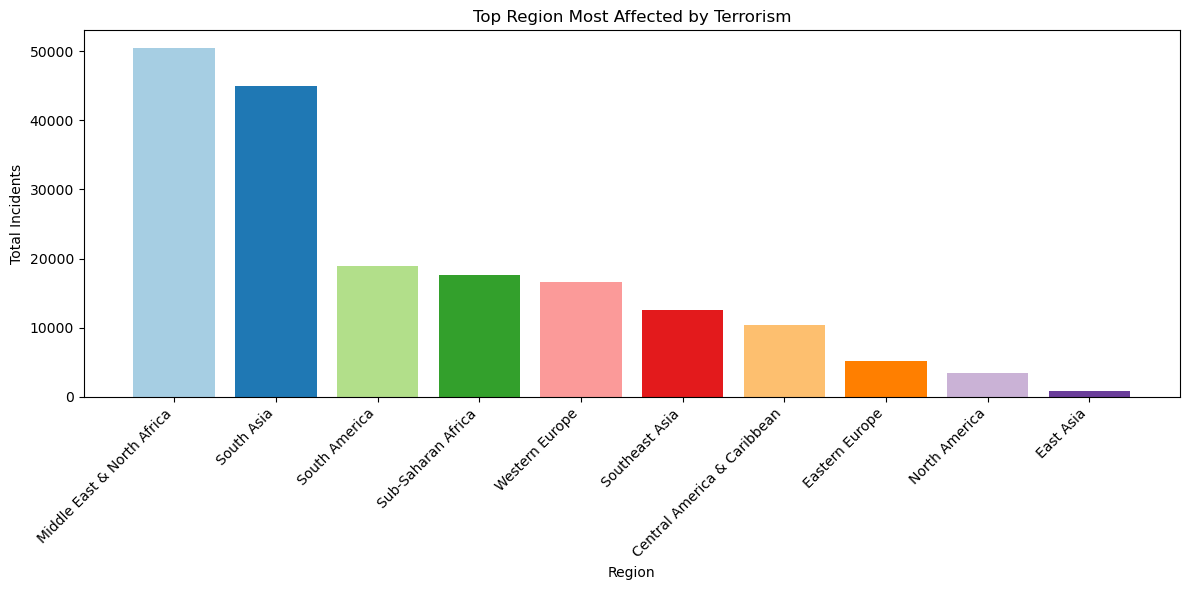

In [44]:
plt.figure(figsize=(12, 6))
Colors = plt.cm.Paired(range(len(top_10_Region_df)))
plt.bar(top_10_Region_df['Region'], top_10_Region_df['Total Attacks'], color=Colors)
plt.xlabel('Region')
plt.ylabel('Total Incidents')
plt.title('Top Region Most Affected by Terrorism')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

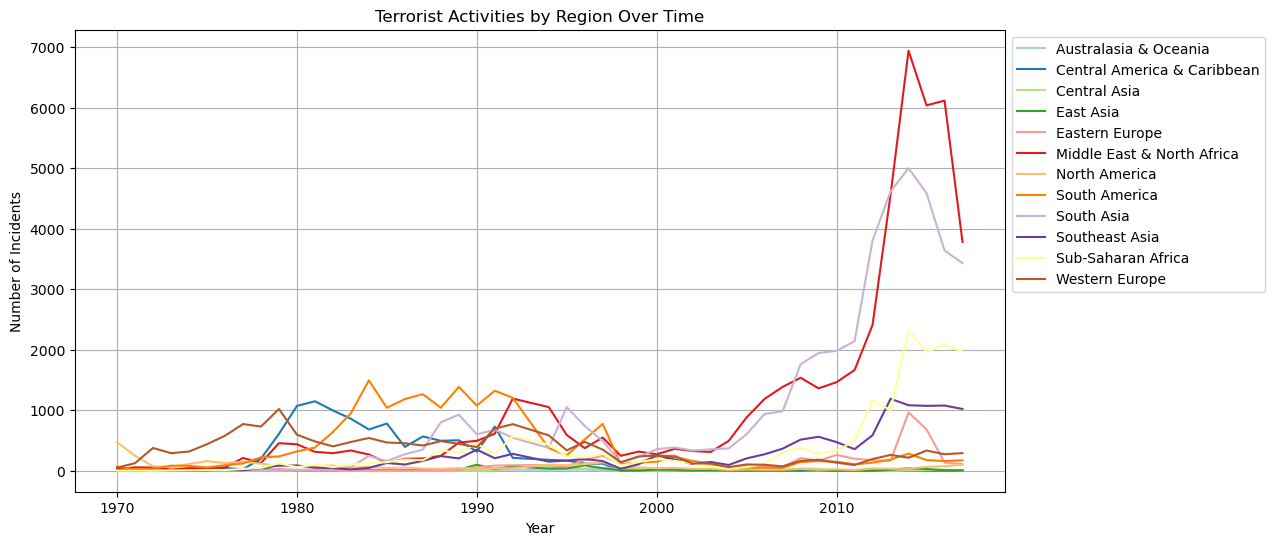

In [45]:
region_year_counts = data4.groupby(['Year', 'Region']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
colors = plt.cm.Paired(range(len(region_year_counts.columns)))
for column, color in zip(region_year_counts.columns, colors):
    plt.plot(region_year_counts.index, region_year_counts[column], label=column, color=color)

plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Terrorist Activities by Region Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [ ]:
This line show the growth of number of attack occur in a region according to each year.most attacks were occured in Middle East and North Africa regions. It.s about total 50474 attacks were occured in this region. 

## Types of Weapons

Let us dicuss about weapons used in attacks.


In [46]:
weapon_types=data4["Weapon_type"].unique()
for weapon_type in weapon_types:
    print(weapon_type)

Unknown
Explosives
Incendiary
Firearms
Chemical
Melee
Sabotage Equipment
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Fake Weapons
Radiological
Other
Biological


(-1.0999997238476895,
 1.099998917487369,
 -1.099999652230446,
 1.0999999626159962)

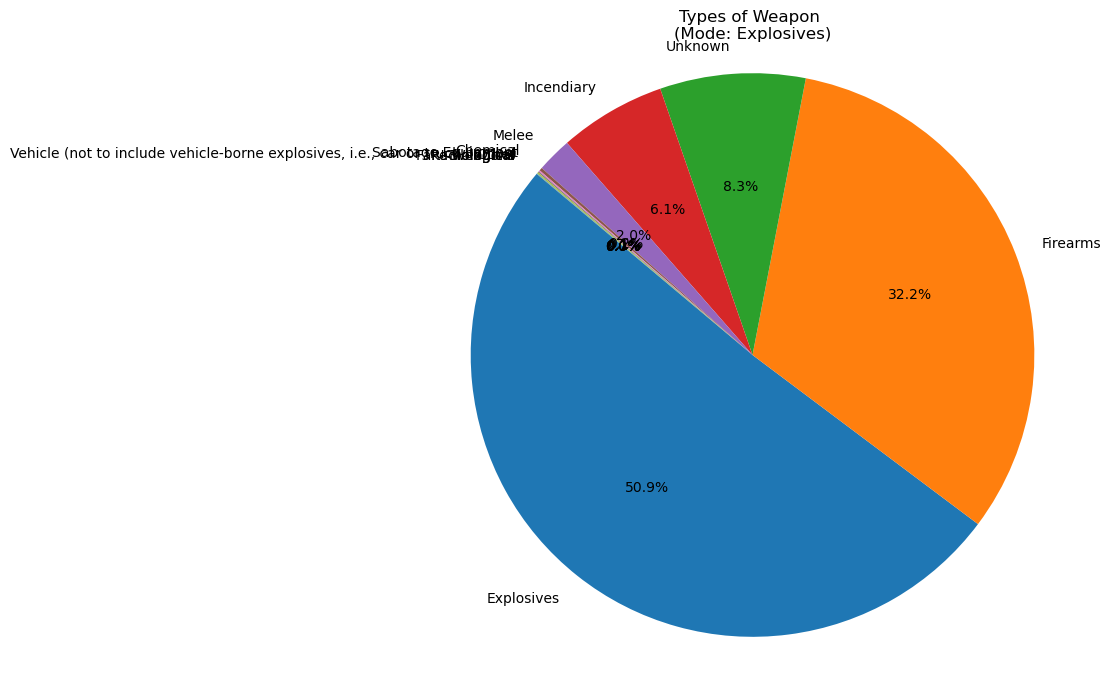

In [47]:
Types_of_weapon = data4['Weapon_type'].mode().iloc[0]
Weapon_counts = data4['Weapon_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Weapon_counts, labels=Weapon_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Types of Weapon \n(Mode: {Types_of_weapon})')
plt.axis('equal')

In [48]:
weapon_type_counts = data4['Weapon_type'].value_counts()

weapon_type_counts_df = pd.DataFrame(weapon_type_counts.reset_index())
weapon_type_counts_df.columns = ['Weapon Type', 'Count']

print(weapon_type_counts_df)

                                          Weapon Type  Count
0                                          Explosives  92426
1                                            Firearms  58524
2                                             Unknown  15157
3                                          Incendiary  11135
4                                               Melee   3655
5                                            Chemical    321
6                                  Sabotage Equipment    141
7   Vehicle (not to include vehicle-borne explosiv...    136
8                                               Other    114
9                                          Biological     35
10                                       Fake Weapons     33
11                                       Radiological     14


In [ ]:
Mostly used weapon is explosive and fire arms.Explosives were used in 92426 attacks and firearms were used in 58524 attacks.

### Terrorist group Vs Types of weapon

In [49]:
group_weapons = data4.groupby('Group')['Weapon_type'].apply(lambda x: ', '.join(x.unique()))

group_weapons_df = group_weapons.reset_index()
group_weapons_df.columns = ['Group', 'Weapons Used']

group_weapons_df[1:10]

,Group,Weapons Used
1,09-Feb,"Explosives, Firearms"
2,14 K Triad,Incendiary
3,14 March Coalition,Firearms
4,14th of December Command,Explosives
5,15th of September Liberation Legion,Explosives
6,16 January Organization for the Liberation of ...,"Firearms, Explosives"
7,1920 Revolution Brigades,Explosives
8,19th of July Christian Resistance Brigade,Firearms
9,1st of May Group,"Unknown, Explosives, Incendiary"


In [50]:
group_weapon_counts = data4.groupby(['Group', 'Weapon_type']).size().unstack(fill_value=0)

group_weapon_counts = group_weapon_counts.apply(lambda x: x.sort_values(ascending=False), axis=1)
group_weapon_counts

Weapon_type,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
Group,,,,,,,,,,,,
01-May,0,0,8,0,2,0,0,0,0,0,0,0
09-Feb,0,0,14,0,7,0,0,0,0,0,0,0
14 K Triad,0,0,0,0,0,4,0,0,0,0,0,0
14 March Coalition,0,0,0,0,1,0,0,0,0,0,0,0
14th of December Command,0,0,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Zulu Miners,0,0,0,0,0,0,0,0,0,0,1,0
Zuwar al-Imam Rida,0,0,0,0,1,0,0,0,0,0,0,0
Zviadists,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
group_attacks = data4.groupby('Group')['id'].count().reset_index()
group_attacks.columns = ['Group Name', 'Total Attacks']
top_10_groups = group_attacks.sort_values(by='Total Attacks', ascending=False).head(10)

group_weapon_types = {}
for group_name in top_10_groups['Group Name']:
    group_data = data4[data4['Group'] == group_name]
    weapon_counts = group_data['Weapon_type'].value_counts().to_dict()
    group_weapon_types[group_name] = weapon_counts


for group, weapons in group_weapon_types.items():
    print(f"Group: {group}")
    for weapon, count in weapons.items():
        print(f"{weapon}: {count} attacks")
    print("\n")


Group: Unknown
Explosives: 48945 attacks
Firearms: 23539 attacks
Incendiary: 4634 attacks
Unknown: 4152 attacks
Melee: 1186 attacks
Chemical: 164 attacks
Sabotage Equipment: 54 attacks
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs): 30 attacks
Other: 28 attacks
Biological: 23 attacks
Fake Weapons: 16 attacks
Radiological: 11 attacks


Group: Taliban
Explosives: 3180 attacks
Firearms: 2655 attacks
Unknown: 1299 attacks
Incendiary: 207 attacks
Melee: 103 attacks
Chemical: 23 attacks
Other: 5 attacks
Sabotage Equipment: 4 attacks
Radiological: 1 attacks
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs): 1 attacks


Group: Islamic State of Iraq and the Levant (ISIL)
Explosives: 3802 attacks
Unknown: 1095 attacks
Firearms: 565 attacks
Melee: 59 attacks
Incendiary: 43 attacks
Chemical: 37 attacks
Other: 9 attacks
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs): 2 attacks
Sabotage Equipment: 1 attacks


Group: 

In [52]:
group_target_counts = data4.groupby(['Group', 'Target_type']).size().unstack(fill_value=0)

most_affected_target_by_group = group_target_counts.idxmax(axis=1)
result_df = pd.DataFrame({'Terrorist Group': most_affected_target_by_group.index, 'Most Affected Target': most_affected_target_by_group.values})

print(result_df)

                            Terrorist Group            Most Affected Target
0                                    01-May                        Business
1                                    09-Feb                        Military
2                                14 K Triad     Private Citizens & Property
3                        14 March Coalition    Terrorists/Non-State Militia
4                  14th of December Command  Religious Figures/Institutions
...                                     ...                             ...
3532                            Zulu Miners                        Business
3533                     Zuwar al-Imam Rida             Airports & Aircraft
3534                              Zviadists         Government (Diplomatic)
3535                             Zwai Tribe                        Business
3536  leftist guerrillas-Bolivarian militia                  Transportation

[3537 rows x 2 columns]


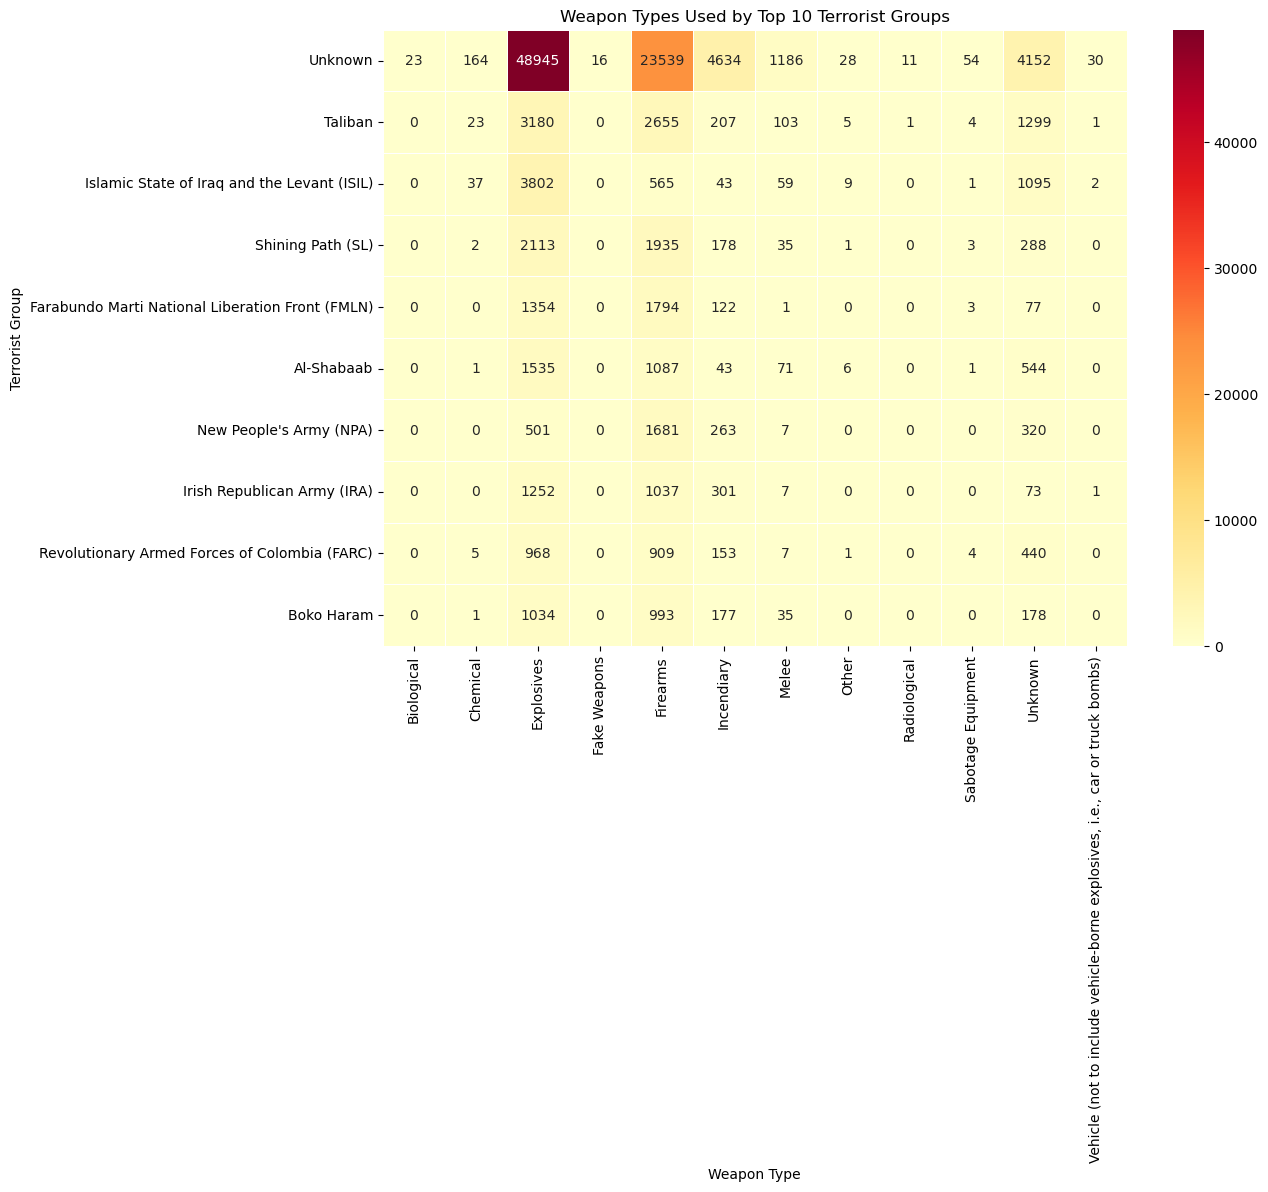

In [53]:
group_weapon_counts = data4.groupby(['Group', 'Weapon_type']).size().unstack(fill_value=0)
top_10_groups = group_weapon_counts.sum(axis=1).nlargest(10).index
top_n_weapon_types = group_weapon_counts.sum().index
subset = group_weapon_counts.loc[top_10_groups, top_n_weapon_types]

plt.figure(figsize=(12, 8))
sns.heatmap(subset, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Weapon Types Used by Top 10 Terrorist Groups')
plt.xlabel('Weapon Type')
plt.ylabel('Terrorist Group')

plt.show()




In [ ]:
This heat map showing the number of attacks done by top 10 group with respect to their weapon.Taliban used explosives for 31802 attacks.Unknown group used explosives and firearms for 48945 and 23539 attacks respectively. 

## Types of peoples affected  by terrorist group

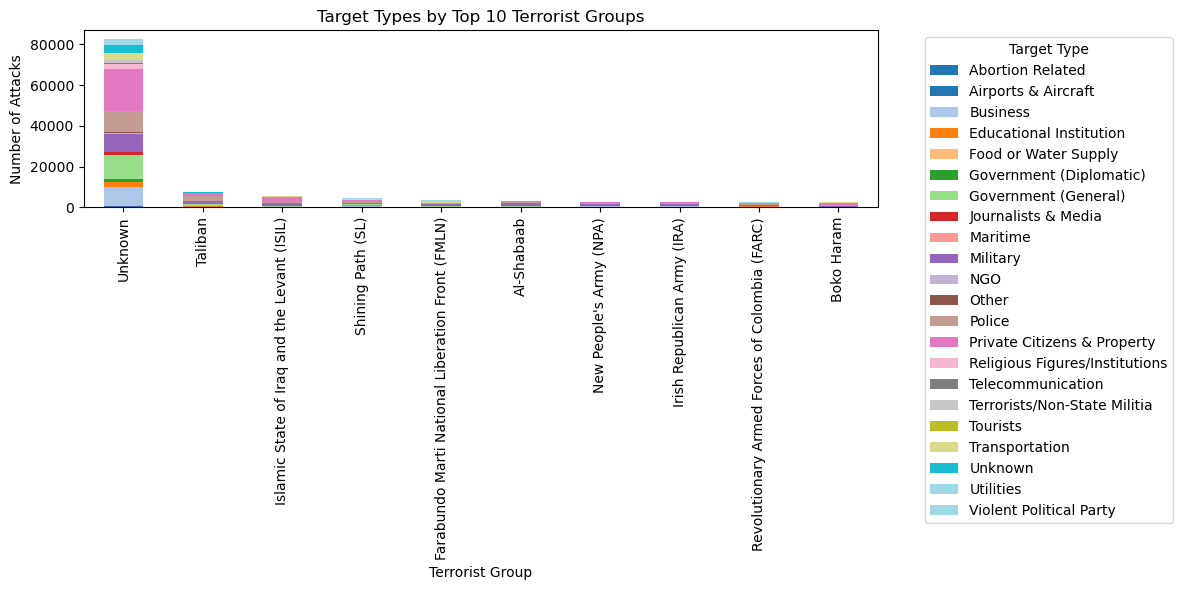

In [54]:
group_target_counts = data4.groupby(['Group', 'Target_type']).size().unstack(fill_value=0)
top_10_groups = data4['Group'].value_counts().head(10).index
group_target_counts_top_10 = group_target_counts.loc[top_10_groups]

ax = group_target_counts_top_10.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.title('Target Types by Top 10 Terrorist Groups')
plt.legend(title='Target Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
48945 and

C:\Users\swani\AppData\Local\Temp\ipykernel_14216\3473449989.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', num_target_types)


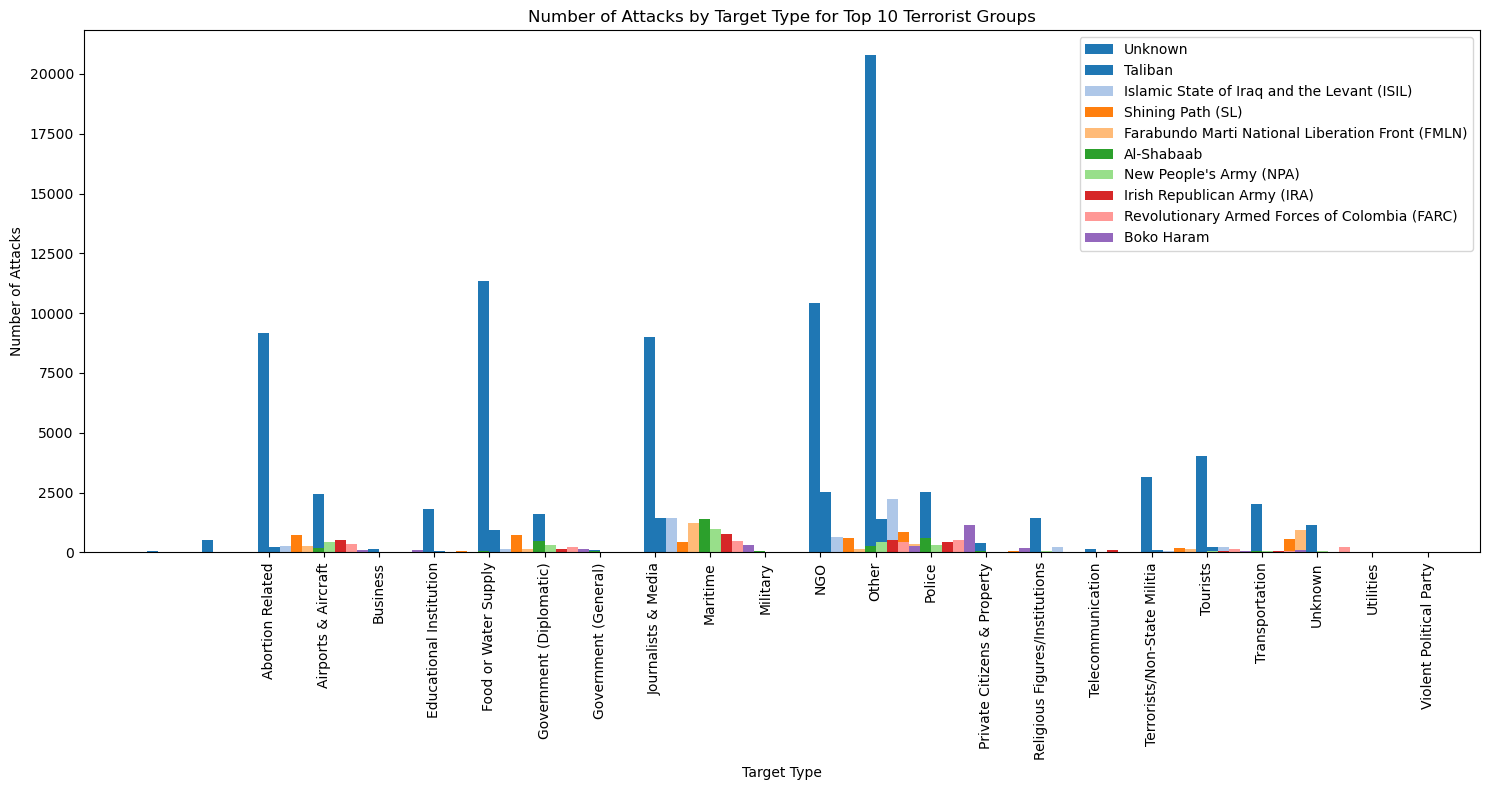

In [60]:
group_target_counts = data4.groupby(['Group', 'Target_type']).size().unstack(fill_value=0)
top_10_groups = group_target_counts.sum(axis=1).nlargest(10).index
top_n_target_types = group_target_counts.sum().index
num_target_types = len(top_n_target_types)

fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.2
bar_positions = np.arange(num_target_types)
color_palette = plt.cm.get_cmap('tab20', num_target_types)  

for i, group in enumerate(top_10_groups):
    counts = group_target_counts.loc[group, top_n_target_types]
    ax.bar(bar_positions + i * bar_width, counts, bar_width, label=group, color=color_palette(i))

ax.set_xlabel('Target Type')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by Target Type for Top 10 Terrorist Groups')
ax.set_xticks(bar_positions + bar_width * (num_target_types - 1) / 2)  
ax.set_xticklabels(top_n_target_types, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

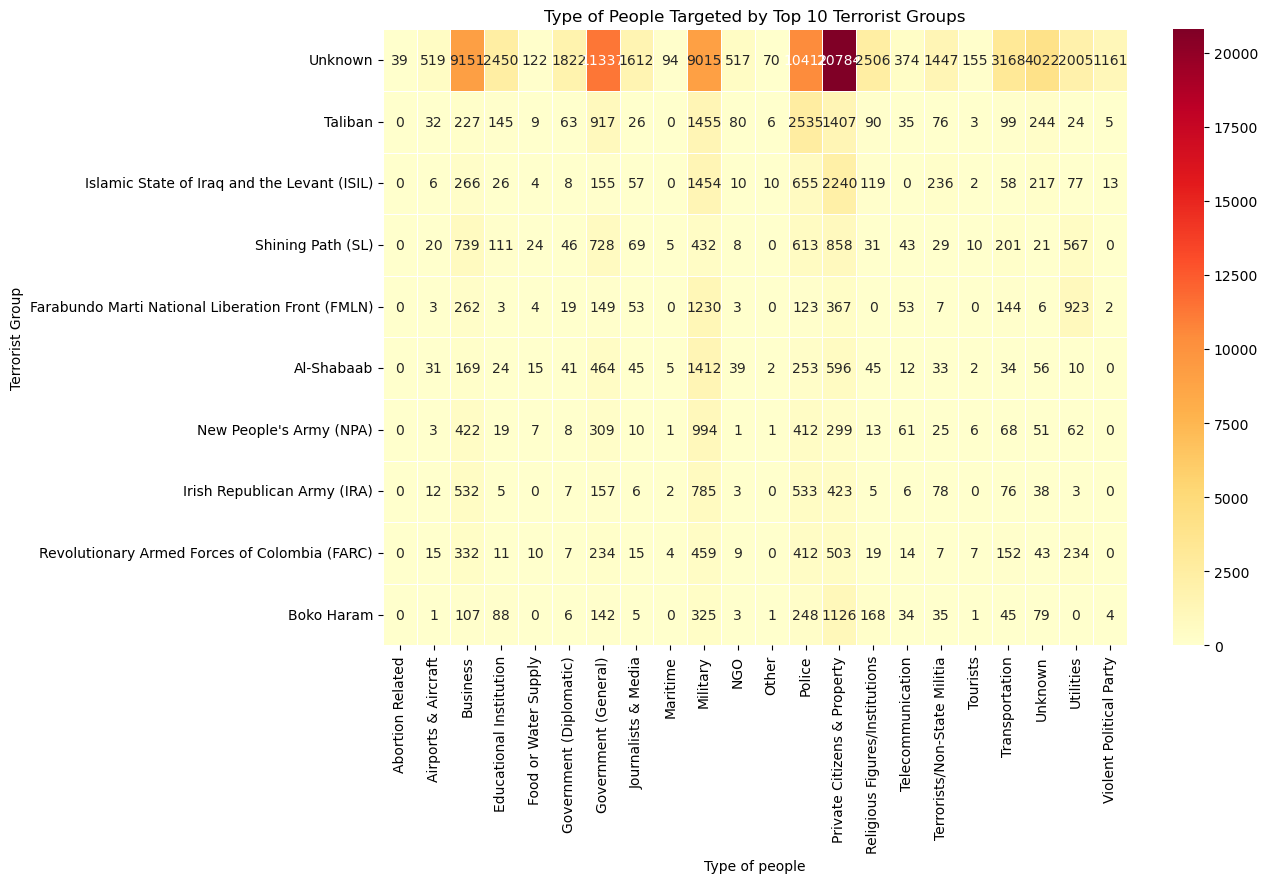

In [58]:
group_target_counts = data4.groupby(['Group', 'Target_type']).size().unstack(fill_value=0)
top_10_groups = group_target_counts.sum(axis=1).nlargest(10).index
top_n_weapon_types = group_target_counts.sum().index
subset = group_target_counts.loc[top_10_groups, top_n_weapon_types]

plt.figure(figsize=(12, 8))
sns.heatmap(subset, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Type of People Targeted by Top 10 Terrorist Groups')
plt.xlabel('Type of people')
plt.ylabel('Terrorist Group')

plt.show()


In [62]:
group_attacks = data4.groupby('Group')['id'].count().reset_index()
group_attacks.columns = ['Group Name', 'Total Attacks']
top_10_groups = group_attacks.sort_values(by='Total Attacks', ascending=False).head(10)
group_target_types = {}

for group_name in top_10_groups['Group Name']:
    group_data = data4[data4['Group'] == group_name]
    target_counts = group_data['Target_type'].value_counts().to_dict()
    group_target_types[group_name] = target_counts

for group, target in group_target_types.items():
    print(f"Group: {group}")
    for target, count in target.items():
        print(f"{target}: {count} attacks")
    print("\n")

Group: Unknown
Private Citizens & Property: 20784 attacks
Government (General): 11337 attacks
Police: 10412 attacks
Business: 9151 attacks
Military: 9015 attacks
Unknown: 4022 attacks
Transportation: 3168 attacks
Religious Figures/Institutions: 2506 attacks
Educational Institution: 2450 attacks
Utilities: 2005 attacks
Government (Diplomatic): 1822 attacks
Journalists & Media: 1612 attacks
Terrorists/Non-State Militia: 1447 attacks
Violent Political Party: 1161 attacks
Airports & Aircraft: 519 attacks
NGO: 517 attacks
Telecommunication: 374 attacks
Tourists: 155 attacks
Food or Water Supply: 122 attacks
Maritime: 94 attacks
Other: 70 attacks
Abortion Related: 39 attacks


Group: Taliban
Police: 2535 attacks
Military: 1455 attacks
Private Citizens & Property: 1407 attacks
Government (General): 917 attacks
Unknown: 244 attacks
Business: 227 attacks
Educational Institution: 145 attacks
Transportation: 99 attacks
Religious Figures/Institutions: 90 attacks
NGO: 80 attacks
Terrorists/Non-Stat

There were varioues types of  people were attacked by terrorist group.Private Citizens and their property are mostly attacked by terrorist group.Police and Military was mostly attacked by Taliban group.

In this Exploratory data Analysis, give the idea about the terrorist attacks and the mode of attack used by terrorist group. Our EDA Extract terrorism dataset into meaning full insights,trends and patterns.We observed that Iraq,Pakistan,Afghanistan and india are the countries mostly affected by attacks.We findout that the Middle East & North Africa ,South Africa and South America are high risk regions. Taliban and ISIL most active terrorist group.Private citizen,Police and Military mostly attacked by terrorist group.Bombing/Explosive weapons are mostly used in terrorist attacks.Most of the people were attacked during the period of 2013-2017.In 2014 and 2015,Most of the people were killed and wounded.

These findings highlights the ongoing importance of understanding and revealing the complex issue of terrorism for global security and stability.
